# One with the Force Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 18

## Read CSV logged by our software

In [2]:
data = pd.read_csv("./data2022-03-03 21-03-34.csv")
data

,time,type,value
0,1.646373e+09,attention,0
1,1.646373e+09,meditation,0
2,1.646373e+09,attention,0
3,1.646373e+09,meditation,0
4,1.646373e+09,attention,0
...,...,...,...
2675,1.646375e+09,meditation,0
2676,1.646375e+09,attention,0
2677,1.646375e+09,meditation,0
2678,1.646375e+09,attention,0


## Aggregate the data and separate into different dataframes

In [3]:
gb = data.groupby('type')
att, med = (gb.get_group(x) for x in gb.groups)

In [4]:
att = att.rename(columns={'value':'attention_val'})
att = att.drop(['type'], axis=1)
att

,time,attention_val
0,1.646373e+09,0
2,1.646373e+09,0
4,1.646373e+09,0
6,1.646373e+09,0
8,1.646373e+09,0
...,...,...
2670,1.646375e+09,57
2672,1.646375e+09,57
2674,1.646375e+09,0
2676,1.646375e+09,0


In [5]:
med = med.rename(columns={'value':'meditation_val'})
med = med.drop(['type'], axis=1)
med

,time,meditation_val
1,1.646373e+09,0
3,1.646373e+09,0
5,1.646373e+09,0
7,1.646373e+09,0
9,1.646373e+09,0
...,...,...
2671,1.646375e+09,60
2673,1.646375e+09,60
2675,1.646375e+09,0
2677,1.646375e+09,0


## EDA

In [6]:
med.describe()

,time,meditation_val
count,1.340000e+03,1340.000000
mean,1.646374e+09,55.532836
std,3.910047e+02,20.468442
min,1.646373e+09,0.000000
25%,1.646374e+09,44.000000
50%,1.646374e+09,57.000000
75%,1.646374e+09,69.000000
max,1.646375e+09,100.000000


In [7]:
att.describe()

,time,attention_val
count,1.340000e+03,1340.000000
mean,1.646374e+09,51.511194
std,3.910048e+02,19.312547
min,1.646373e+09,0.000000
25%,1.646374e+09,41.000000
50%,1.646374e+09,53.000000
75%,1.646374e+09,63.000000
max,1.646375e+09,100.000000


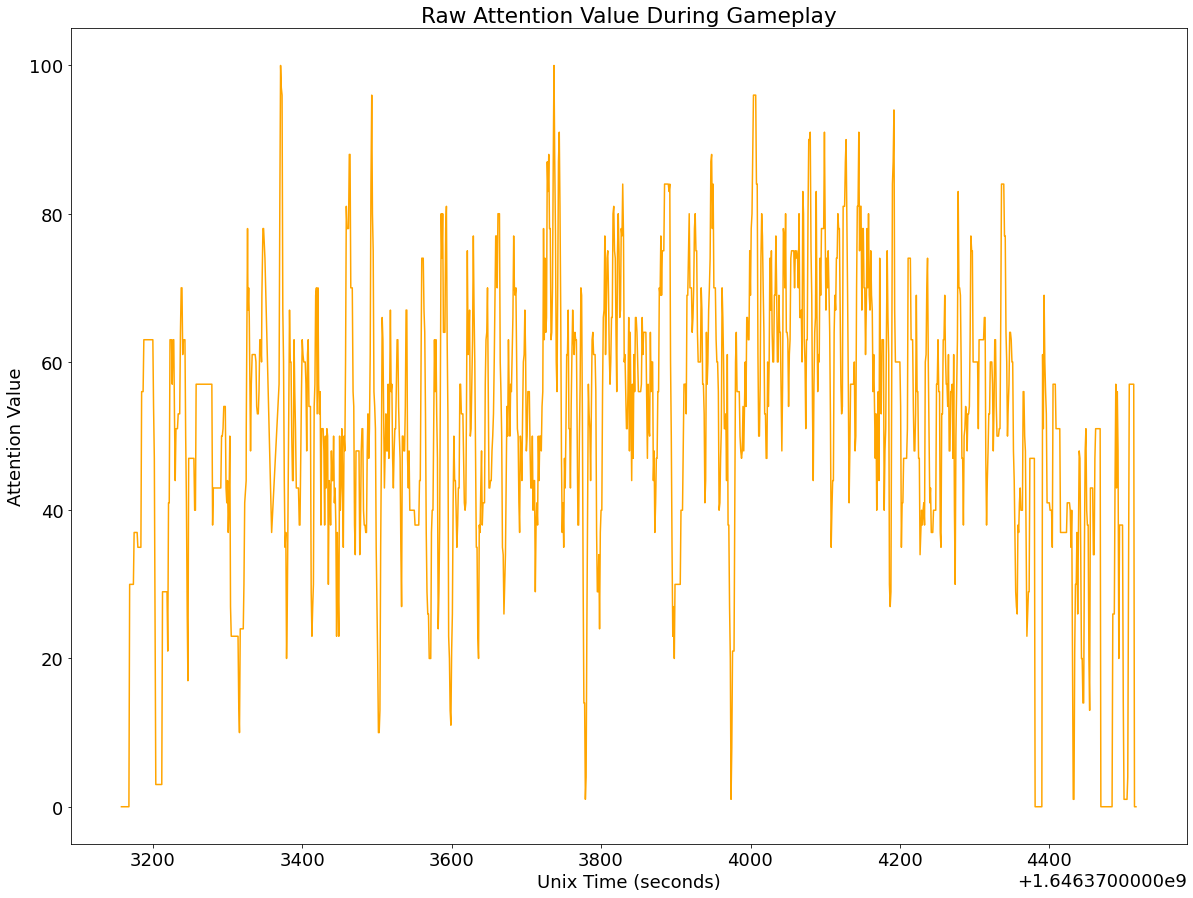

In [8]:
plt.plot(att['time'], att['attention_val'], color='orange')
plt.xlabel('Unix Time (seconds)')
plt.ylabel('Attention Value')
plt.title('Raw Attention Value During Gameplay');

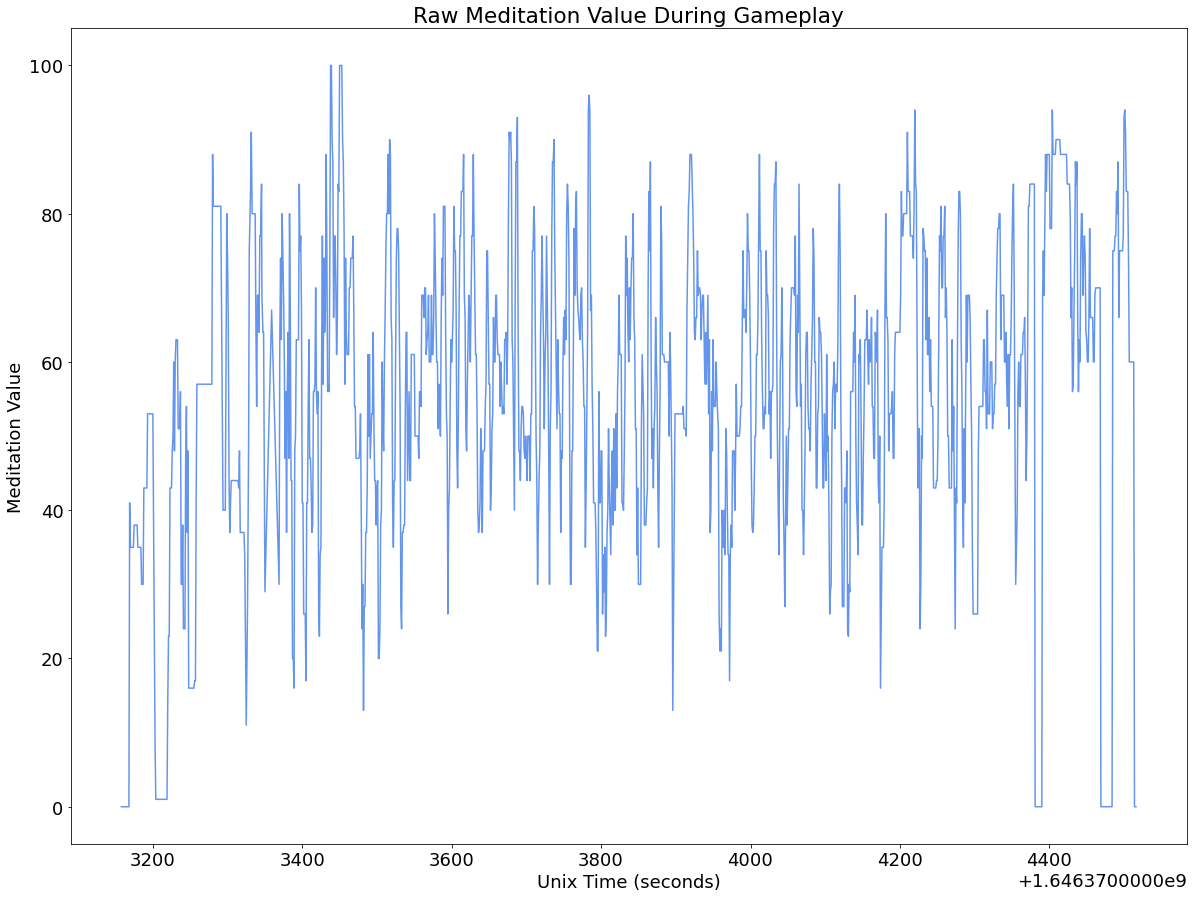

In [9]:
plt.plot(med['time'], med['meditation_val'], color='cornflowerblue')
plt.xlabel('Unix Time (seconds)')
plt.ylabel('Meditation Value')
plt.title('Raw Meditation Value During Gameplay');

In [10]:
rolling_mean_attention = att.attention_val.rolling(window=50).mean()
rolling_mean_meditation = med.meditation_val.rolling(window=50).mean()

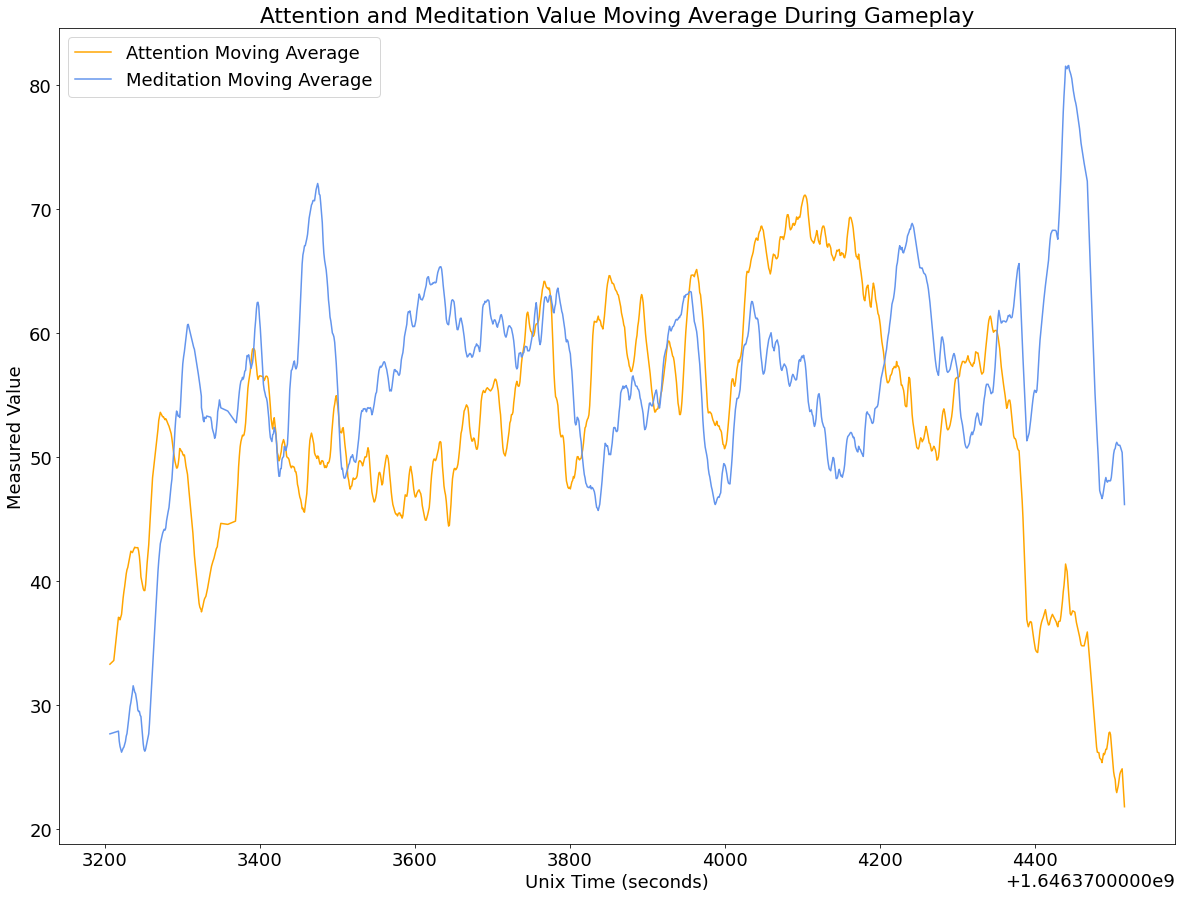

In [11]:
plt.plot(att.time, rolling_mean_attention, label='Attention Moving Average', color='orange')
plt.plot(med.time, rolling_mean_meditation, label='Meditation Moving Average', color='cornflowerblue')
plt.legend()
plt.xlabel('Unix Time (seconds)')
plt.ylabel('Measured Value')
plt.title('Attention and Meditation Value Moving Average During Gameplay');

We can see that the median attention is 53 with the 75th percentile at 63. Thus we will use 50 as the minimum attention value for using the block ability since we want that to be a fairly easy ability to use while locking away more advanced force abilities like slow at a minimum of 60 since we want people to work a little harder to use this ability. During testing, we found that if the levels were set too high, participants got tired or frustrated and would eventually give up.